# Machine Learning Workflow Iris

A typical machine learning workflow:

1. Dataset Curation
2. Dataset Pre-processing
3. Dataset Provision
4. Training Configuration
5. Model Training Run
6. Evaluation
7. Iterative Optimisation

We will look at the above workflow based on a commonly used machine learning dataset called "Iris Data Set".

The "Iris Data Set" is small dataset with the following stats:

* 4 `Features` (Attributes)
* 150 `Samples` (Instances, Rows)

You can read more a bit more on the dataset here: https://archive.ics.uci.edu/ml/datasets/iris/.




# [Step 2] Dataset Pre-Processing

The easiest way to load the IRIS dataset is to use the built-in functionality of sci-kit learn.

You can load the IRIS dataset with the following commmands:

``from sklearn import datasets
iris = datasets.load_iris()
``

To familiarize ourselves with the structure of a dataset and to get to know the tooling we need to load our own datasets we will load the dataset ourselves.



## Downloading the Data

The data for the Iris dataset can be downloaded from.

https://archive.ics.uci.edu/ml/machine-learning-databases/iris/
    
The web directory contains two files that are important for us:

* iris.data
* iris.names

On a Linux or Mac OS machine you can use the following commands to download the files to a local directory.


In [1]:
# wget is a handy command line utility that allows downloading the specified URL
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names

--2020-10-02 12:27:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2998 (2.9K) [application/x-httpd-php]
Saving to: ‘iris.names.2’

iris.names.2        100%[===================>]   2.93K  --.-KB/s    in 0s      

2020-10-02 12:27:33 (57.2 MB/s) - ‘iris.names.2’ saved [2998/2998]



## Inspecting the  Iris Dataset Format

Using the command line (or a text editor) we can inspect that dataset.

The `!` operator will allow you to execute command line commands from a Jupyter cell. 
This should work on all supported operating systems (Mac OS, Linux, Windows).

On a mac or linux machine you can make use of the following command line commands:

* `head` : Show top n lines of a text file
* `tail` : Show last n lines of a text file
* `cat`  : Print full content of a text file
* `wc -l`: Count number of lines of a text file

On a Windows machine the following should work:

* `more` : Show content of a text file (might hang in Jupyter)
* `type` : Print content of a text file 

In [24]:
# head and tail are other useful command line utilities on a linux machine that allow us to see the first n or last 
# n lines of a text file.

# Take your time to inspect both files with the head and tail commands. If you know that a file is not too long you can
# also make use of the cat command that prints an entire files contents. For large files this is not advised as it can 
# easily overpower the javascript based rendering on the browser.

!tail -n 150 iris.data

4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.4,3.7,1.5,0.2,Iris-setosa
4.8,3.4,1.6,0.2,Iris-setosa
4.8,3.0,1.4,0.1,Iris-setosa
4.3,3.0,1.1,0.1,Iris-setosa
5.8,4.0,1.2,0.2,Iris-setosa
5.7,4.4,1.5,0.4,Iris-setosa
5.4,3.9,1.3,0.4,Iris-setosa
5.1,3.5,1.4,0.3,Iris-setosa
5.7,3.8,1.7,0.3,Iris-setosa
5.1,3.8,1.5,0.3,Iris-setosa
5.4,3.4,1.7,0.2,Iris-setosa
5.1,3.7,1.5,0.4,Iris-setosa
4.6,3.6,1.0,0.2,Iris-setosa
5.1,3.3,1.7,0.5,Iris-setosa
4.8,3.4,1.9,0.2,Iris-setosa
5.0,3.0,1.6,0.2,Iris-setosa
5.0,3.4,1.6,0.4,Iris-setosa
5.2,3.5,1.5,0.2,Iris-setosa
5.2,3.4,1.4,0.2,Iris-setosa
4.7,3.2,1.6,0.2,Iris-setosa
4.8,3.1,1.6,0.2,Iris-setosa
5.4,3.4,1.5,0.4,Iris-setosa
5.2,4.1,1.5,0.1,Iris-setosa
5.5,4.2,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.0,3.2,1.2,0.2,Iris-setosa
5.5,3.5,1.3,0.2,Iris

As we can see the Iris dataset is a `CSV` (Comma Separated Values) file.

Each row contains 5 values: 4 `double` values and a `string`.
The 4 `double` values represent the 4 `features` (in this case measurements of the plant).
The `string` value represents the `class` (type) of plant.

# [Step 3] Provision: Loading the Dataset into a Dataframe

Provisioning data means making data available in the expected format of a library or application program.
In our case we will be using the sci-kit learn library and the machine learning algorithms that are available as part of this library. 

### NumPy Arrays

Most algorithms that form part of sci-kit learn accept datasets in form of `NumPy` `arrays` as input.
`NumPy` is a library that offers implementations of numerical `arrays`, `multi-dimensional arrays`, `matrices` and mathematical operations that can be applied to these data structures. It is the basis for many machine learning libraries in Python due to the reliability (as in reliable results) and efficiency (as in computational efficiency) of its implementation (in Python and in C). 

The following links provide some nice introductions.

* http://scipy-lectures.org/intro/numpy/array_object.html#what-are-numpy-and-numpy-arrays

Frequent commands that we will use initially are:

* `import numpy as np` : Importing as `np` is a common convention
* `array_named_a.ndim` : Give back the dimensionality of the array (i.e. 1-dimension, 2-dimensional) ...
* `array_named_a.shape`: What is the `shape` of the dimensions of the array (one can think of it as number of rows and columns)
* `len(array_named_a)` : What is the length of the array (i.e. the number of rows).


### Pandas

Pandas is a library for handling of dataframes that wraps numpy arrays and tries to simplify their handling and the loading from and to other dataformats.

We will start of with the following initial command:

* `import pandas as pd` : Importing as `pd` is a common convention
* `pd.read_csv()` : Read CSV input into a dataframe

In order to understand how to use the read_csv() method we can use the `?` operator as shown in the cell below.

This will pull up documentation for the method parameters, the return type, and example usage (the latter at the end of the documentation).

In [25]:
import pandas as pd
pd.read_csv?

### Exercise: Load the Iris.data CSV file with pandas

Take a look at the documentation of the read_csv() method and load the `Iris.data` file with pandas.
In case you still miss the pandas package use the `!conda install -y` functionality to pull and install the package. 

In [26]:
# load the Iris.data CSV file into a dataframe called iris_dataframe

iris_dataframe = pd.read_csv('iris.data', header=None)

In [27]:
# You can use the head() method in order to inspect the loaded dataframe.
# Your result should look exactly like shown below.
# If your result looks different then please have a look at the documentation of the parameters of the read_csv method 
# and load the data again. 

iris_dataframe.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# The `?` operator can also be directly applied to objects. E.g to identify what is iris_dataframe we can apply it as
# shown below.

iris_dataframe?

***Exercise***: Inspect the iris_dataframe with the shape, ndim and len() attributes and methods.

In [7]:
# Inspect the iris_dataframe



### Exercise: Create an Input and Response Dataframe

If we want to train a supervised machine learning model based on the Iris dataset we have to split our original iris_dataframe into an Input and a Response dataframe.

* The `Input` dataframe contains the `features` that are the input for the learning and decision making of the machine learning model.
* The `Response` (a.k.a. `Target`) dataframe contains the correct expected values (a.k.a answers) that the system is suppposed to learn.

***Iris Setosa Classifier***

If we want to train a classifier (a machine learning model that predicts the class/type of Setosa flower based on the 4 measurements) then the content of the `Input` and `Response` dataframes would consist of the following:

* `Input`: Each row of the dataframe consists of the 4 measurement values
* `Response` : Each row of the dataframe consists of the `class` of the flower 

To create these two dataframes we can use the functionality provided by pandas:

* https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#basics holds the full documentation but is not very easy to read

The main functionality we will make use of are:

***Selecting columns by label:***

We can use `[]` brackets to select a subset of a dataframe. To select a set of columns we can use an array of labels (column headings).

E.g. `sample_dataframe[[0,5]]` would give us back a dataframe consisting of the columns with the ***names*** `0` and `5`.

Use `sample_dataframe.columns` to get the available columns and their labels listed. 


***Slicing subsets by row:***

This can be achieved by using the `[start:end]` operator.
It is a pretty simple way to select rows.

* `sample_dataframe[0:5]` : Select row 0,1,2,3,4 of sample_dataframe (***end*** is not inclusive)
* `sample_dataframe[start:]` : Select everything from start until the end of the dataframe
* `sample_dataframe[:end]` : Select everything from the start until end - 1 index of the dataframe
* `sample_dataframe[:]` This would select the full dataframe (all rows)

This notation is not limited to dataframes. It works with all lists in Python.  For a list the use of this operator will result in a new copy of the dataframe. For numpy arrays it will result in a view that shares the memory with the source dataframe. 


The best documentation of the slice operator I know of is provided here: https://stackoverflow.com/questions/509211/understanding-slice-notation?page=1&tab=votes#tab-top

Based on the above documentation create the `Input` and `Response` dataframes in the cell below.

In [28]:
# There are different naming conventions people use for these dataframes
# input, response or X,Y are common. input, target is also commonly used.
iris_dataframe_input = iris_dataframe[[0,1,2,3]]
iris_dataframe_response = iris_dataframe[[4]]

***Exercise: Inspect the newly created dataframes***

Use the tooling we introduced before in order to inspect your newly created dataframes. 

* `head()`
* `shape`
* `dim`
* `len()`


In [9]:
# Inspect your dataframes with the above tools in order to get familiar with them
# Inspecting the intermediary artifacts in the machine learning workflow is a common and crucial task.
# It is easy to imagine how one can be off when sub-setting or slicing through the input data by making a mistake. 
# These kind of errors are usually disastrous in terms of the outcome of the trained model. The earlier we catch them
# the less expensive they are to fix.




# [Step 4] Training Configuration

The next step consist of creating the configuration for the training. 

The main dependencies for choosing a training set up are:

* The data used for training (data type, quality, amount)
* The task we want to solve (what we want the machine learning system to achieve)

Based on these two aspects designing the training set up consists of the following steps:

1. Choose training algorithm
2. Create initial configuration for training algorithm

## Criteria for Choosing A ML Algorithm

Some main criteria for choosing a training algorithm are the following:

* Task Fit : I.e. can the task we want to solve with ML be solved with the given algorithm
* Scalability: How scalable in terms of the shape (columns, rows) of the input data is the algorithm 
    * The amount of features has a major impact on the scalability of algorithms
    * The amount of samples (rows) has a major impact on the execution time of the algorithm
* Expected Performance: What is the expected accuracy of the algorithm.
* Interpretability: How easy, hard is it to understand what is happening in the algorithm. How hard would it be to 'debug' the behaviour of the algorithm.
* Updatable Learning: Can the learned model be updated with more data at a later stage.
* Availability: In the pragmatic sense; is a trusty implementation of the algorithm available (also from a license perspective).
* Solution requirements: Do we have requirements from the software solution side. Maximum latency, memory limitations, etc ... . 

As the above list highlights, choosing the 'right' algorithm is a complex tasks with many potential considerations.
On the flip side it means that making the right choices has massive potential value. 

## Choosing an Initial Configuration

The choice of an initial training configuration often depends mainly on:

* Stats of the training data 
     * Hyperparameters often allow us to adjust the training to the amount of the training data
* Experience or documented well working configurations 
     * This is often based on identifying `baselines` that worked well on data that we deem similar to our training data.
     

## Classification Task

One machine learning task that fits well to the Iris dataset is `classification`.
`Classification` is the task of assigning a `class` (type) to samples based on the input features. 
For the Iris dataset that translates to using the features (4 measurements) as input for taking the decision (to classify) which type of Iris plant it is. 

## Classification Algorithm

Lets say we aim for classifing the type of Iris based on the input.

This is the `task` that we want to solve.

The choice of `task` informs the choice of our machine learning algorithm.
In this case we choose a `classification algorithm`, also called `classifier`.

A commonly used classification algorithm is called `logistic regression`.
For our initial classification experiments we will make use of this algorithm type.

We can make set up this algorithm by the following steps:

* Import: `from sklearn.linear_model import LogisticRegression`
* Instantiate Model Class: `LogisticRegression`



In [29]:
# Exercise: Set up the logistic regression model

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

# [Step 5] Model Training Run

Algorithms in scikit-learn can be trained by using the `fit` method. Calling it `fit` is based on the process of `fitting` the model's weights (also called model parameters) during training.
`Fitting` means that the weights of the model are adjusted during the training (a.k.a learning) phase based on the input data we have seen.



## Training Run

Training a model based on the input data is often referred to as executing or making a `training run`; or simply just a `run`. 

Common ways to use this terminology are e.g.:

* "I have made a run with the following input data and these hyperparameters".
* Which parameters (meaning hyperparameters) were used for the run?
* What was the best run?

Running a training in scikit-learn can be based on executing the following. 

In [30]:
trained_model = classifier.fit(iris_dataframe_input, iris_dataframe_response.values.ravel())

/home/dev/BIN/anaconda3/envs/deng_sample_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dev/BIN/anaconda3/envs/deng_sample_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [12]:
# Exercise:
# The above warning messages can be resolved by providing some arguments when we instantiate the classfier.
# Take a look at the documentation and configure the classifier in a way that removes these warnings.
classifier?

In [31]:
classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs')

### Testing our trained model

For a first easy test we can used the `predict` method as shown below.
The predict method allows us to pass in data with the same format as the input data.

As an exercise try passing in data with a different format. 

In [32]:
import numpy as np

trained_model.predict([[0.5,5.0,2.0,1.0]])

array(['Iris-setosa'], dtype=object)

You can also use the slicing approach we introduced earlier to pass in a subset of the rows of our input data to test the model.

In [33]:
trained_model.predict(iris_dataframe_input[0:10])

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

## [Step 6] Evaluation

In [35]:
score = trained_model.score(iris_dataframe_input, iris_dataframe_response.values)
print(score)

0.96


## Splitting into Train and Test


If we use the same samples for the training of the model and its evaluation, the measured performance is likely a bad
indicator of the performance we can expect when we let the model take decisions on data it has not seen before.

Testing with the same data that was used for training will usually result in a much higher score. This is due to the effect of fitting the weights the model learns completely on the seen samples.

It is therefore custom to split the available labeled data into two parts before we start training of the ML model:
* Train Portion
* Test Portion

The train portion is the part of the dataset that is used for the training of the model.
The test portion is the part of the dataset that is ***excluded*** from the training of the model.
This is also called ***holding out*** part of the data. This ***unseen data*** (i.e. data that the model has never seen before) is then used to evaluate how well the model is doing.

Typical splits between train and test are 70/30 or 80/20. 


### Considering the Order of the Input Data

When splitting the data into a test and train portion it is important to try to split the data in random fashion. 
We try to avoid an in-balance for the frequency of classes in either test or train, or an in-balance in terms of 'hard' and 'easy' cases when splitting the data.

The best way to achieve this, is to randomly sample (or shuffle) the input data before making the split. 

Pandas offers us the `sample(frac=double_value)` method as a simple way to do this.


### Exercise: Create Train and Test datasets

* Create a Train and Test portion of the input data.
* You should take the original `iris_dataframe` as input for this
* The iris_dataframe is pre-sorted by class. It is a good example of a case where shuffling or sampling from data before the split is a must. So you should start with this. 

In [40]:


iris_df_shuffled = iris_dataframe.sample(frac=1.0)

iris_df_train = iris_df_shuffled[:100]
iris_df_test = iris_df_shuffled[100:]

iris_df_train_input = iris_df_train[[0,1,2,3]]
iris_df_train_response = iris_df_train[[4]]

iris_df_test_input = iris_df_test[[0,1,2,3]]
iris_df_test_response = iris_df_test[[4]]



### Exercise: Train Classifier on Train Dataset

Take the train dataset you have created and use it to re-train the classifier.

In [41]:
  trained_model = classifier.fit(iris_df_train_input, iris_df_train_response.values.ravel())

### Exercise: Evaluate Classifier with Test Dataset

* Use the test dataset you have created and evaluate the classifier trained on the train dataset.
* Execute the splitting, training and evaluation multiple times and observe what happens to the score.


In [42]:
trained_model.score(iris_df_test_input, iris_df_test_response)

0.96

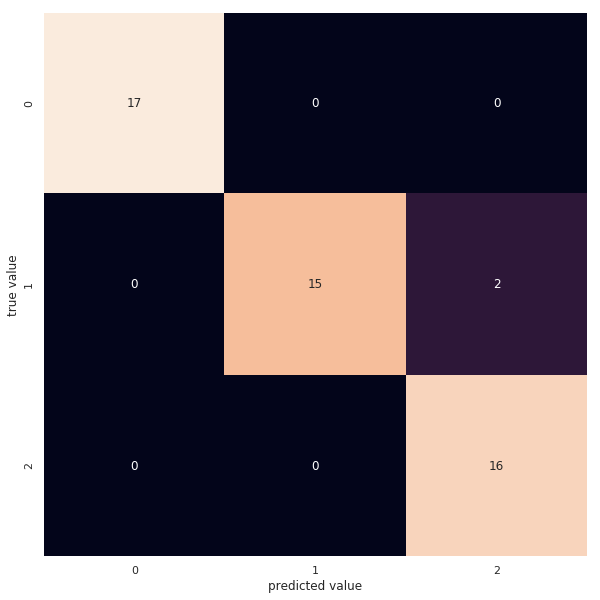

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(iris_df_test_response, trained_model.predict(iris_df_test_input))
plt.subplots(figsize=(10,10))
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');


In [21]:
!conda install -y seaborn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.11
  latest version: 4.8.5

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/dev/BIN/anaconda3/envs/deng_sample_env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.7.22  |                0         132 KB
    certifi-2020.6.20          |           py36_0         160 KB
    openssl-1.1.1h             |       h7b6447c_0         3.8 MB
    seaborn-0.11.0             |             py_0         216 KB
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following NEW packages will be INSTALLED:

  _libgcc_mutex      pkgs/main/linux-64::_libgcc_mutex-0.1-main
  seaborn     